In [1]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

## extracttimes function
extract time stamps in log files or edgelist tensor

groupids: the group col idx used for aggregating timestamps
aggts: dict whose key is an integer(user id) and value is a list of integers(timestamp list)

In [2]:
#infile = '/home/liushenghua/Data/wbcovid19rummor/renameoppuid/*.reid.reid.gz'
##outfile = '../output/agg.ts'
##aggts = ioutil.extracttimes(infile, outfile=None, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
##                        isbyte=True, comments='#', nodetype=str, groupids=[1])

In [3]:
outfile = '../output/agg.ts.gz'
aggts = ioutil.loadDictListData(outfile, ktype=int, vtype=int, delim=':')

## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

caliatpair function：calculate iat dict **iatpaircount** (key:(iat1, iat2), value: frequency)

In [4]:
instance = iatutil.IAT()

In [5]:
# calculate aggiat dict
instance.calaggiat(aggts)
aggiat = instance.aggiat
aggiat[0]

In [8]:
instance.save_aggiat('../output/aggiat.dictlist.gz')

In [9]:
instance.load_aggiat('../output/aggiat.dictlist.gz')

In [12]:
xs, ys = instance.getiatpairs()


In [13]:
len(xs), len(ys)

(290550016, 290550016)

In [15]:
import numpy as np
np.ceil(np.log10(max(xs))),np.ceil(np.log10(max(ys)))

(7.0, 7.0)

[Warning] logscale with nonpositive values in x coord
	remove 97287 nonpositives
[Warning] logscale with nonpositive values in y coord
	remove 90707 nonpositives


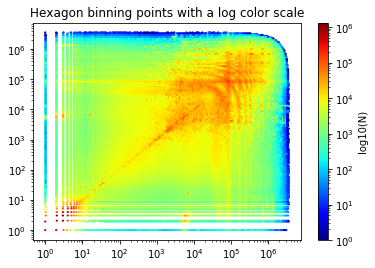

In [17]:
hexfig = drawutil.drawHexbin(np.array(xs), np.array(ys), gridsize=200)

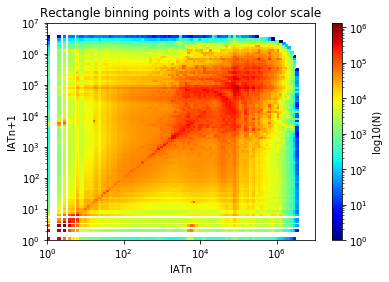

In [23]:
fig, hist = drawutil.drawRectbin(xs, ys, outfig='../output/iatall.png', gridsize=100, xlabel='IATn', ylabel='IATn+1')

 ## Find suspicious users
    
find the bin with the largest number of samples in the range of
horizontal axis: [x-radius, x+radius]
vertical axis: [y-radius, y+radius]
    
xbinidx, ybinidx: the bin index of bins in horizontal axis and vertical axis